<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

# EDA

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.shape

(1460, 81)

In [5]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#searching for columns with null value
house_null = (house.isnull().sum()) / house.shape[0]
mask = house_null !=0
house_null = house_null[mask].sort_values(ascending = False)
house_null

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

From the data description most of the features with null values are indicate as not available instead of missing value. This can be confirmed from pool area which contained 0 indicating pool is unavailable

In [7]:
#dropped Id which cannot be use as a predictor, dropped columns with null values more than 90%, dropped PoolArea due to correlate with PoolQC
house = house.drop(columns=['Id','PoolQC','MiscFeature','Alley','PoolArea'])

In [8]:
#only residential data
house = house[house['MSZoning'].str.startswith('R')] 

In [9]:
house_null = (house.isnull().sum()) / house.shape[0]
mask = house_null !=0
house_null = house_null[mask].sort_values(ascending = False)

In [10]:
for col in house_null.index: #check unique value for columns with null
    print(col, 'unique number:\n', house[col].unique())

Fence unique number:
 [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu unique number:
 [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
LotFrontage unique number:
 [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  73.  77.
  64.  94. 105.  90.  55.  88.  82.  71.  24. 120. 107.  92. 134.  40.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  34.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56.  58.  38. 109. 130.  53. 137.  35.  45. 106. 104.  42.  39. 144.
 114. 102. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
GarageCond unique number:
 ['TA' nan 'Gd' 'Fa' 'Po' 'Ex']
GarageQual unique number:
 ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageFinish unique number:
 ['RFn' 'Unf' 'Fin' nan]
GarageYrBlt unique number:
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 19

In [11]:
house['Fence'] = house['Fence'].fillna(value='No')
house['FireplaceQu'] = house['FireplaceQu'].fillna(value='No')
house[['GarageType','GarageFinish','GarageQual','GarageCond']] = house[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna(value='No')
house[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = house[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna(value='No')
house['MasVnrType'] = house['MasVnrType'].fillna(value='No')

In [12]:
house['Electrical'].value_counts()

SBrkr    1263
FuseA      90
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [13]:
#replaced the single null value under 'Electrical' column with most frequent value
house['Electrical'] = house['Electrical'].fillna(value='SBrkr')

In [14]:
#for Garage year built, replaced with year of house built
house.loc[:,'GarageYrBlt'] = house['GarageYrBlt'].fillna((house['YearBuilt']).astype(int))

#for Masonry veneer area's null value, replaced 0 since MasVnrType is not available
house.loc[house['MasVnrArea'].isnull(), 'MasVnrArea'] = 0

In [15]:
#for Lot Frontage null value, replaced with columns' median value, using median to avoid outliers
from sklearn.preprocessing import Imputer

imp_lot = Imputer(missing_values = 'NaN', strategy = 'median')
house[['LotFrontage']] = imp_lot.fit_transform(house[['LotFrontage']])

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
house.isnull().values.any() #check for null value

False

In [17]:
#check number of zeros per columns in %
col_zeros = ((len(house)-(house.astype(bool).sum(axis=0))) / len(house)).sort_values(ascending = False) 
col_zeros.head(10)

LowQualFinSF     0.984116
3SsnPorch        0.982671
MiscVal          0.963899
BsmtHalfBath     0.941516
ScreenPorch      0.917690
BsmtFinSF2       0.879422
EnclosedPorch    0.854152
HalfBath         0.639711
MasVnrArea       0.590614
2ndFlrSF         0.581949
dtype: float64

In [18]:
#columns with imbalance data
print(house['Utilities'].value_counts())
print(house['Street'].value_counts())

AllPub    1384
NoSeWa       1
Name: Utilities, dtype: int64
Pave    1381
Grvl       4
Name: Street, dtype: int64


In [19]:
#drop columns with zero value more than 90% and columns which is extreamly imbalance
house = house.drop(columns=['LowQualFinSF','MiscVal','BsmtHalfBath', 'Utilities','Street'])

#drop SaleType and SaleCondition due to both features are after the property sold, which cannot be use as predictor
house = house.drop(columns=['SaleType','SaleCondition'])

In [20]:
#clean columns with only one unique number
unique = house.nunique()
unique = unique[unique.values == 1]
house.drop(labels = list(unique.index), axis =1, inplace=True) 

In [21]:
house['SalePrice'].describe()

count      1385.000000
mean     180136.283032
std       79906.363281
min       37900.000000
25%      129000.000000
50%      160000.000000
75%      212900.000000
max      755000.000000
Name: SalePrice, dtype: float64

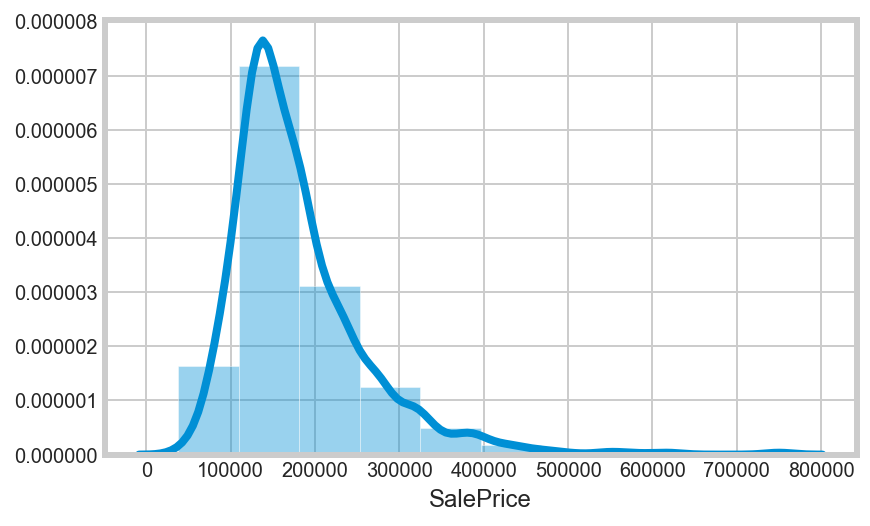

In [22]:
sns.distplot(house['SalePrice'],bins=10)

In [23]:
corr = abs(house.corr(method='pearson').drop(['SalePrice'])['SalePrice'])
corr = corr[corr>0.5]
corr.sort_values(ascending = False)

OverallQual     0.790986
GrLivArea       0.708499
GarageCars      0.640954
GarageArea      0.629048
TotalBsmtSF     0.617536
1stFlrSF        0.617059
FullBath        0.557077
TotRmsAbvGrd    0.536250
YearBuilt       0.517466
MasVnrArea      0.508017
GarageYrBlt     0.505334
Name: SalePrice, dtype: float64

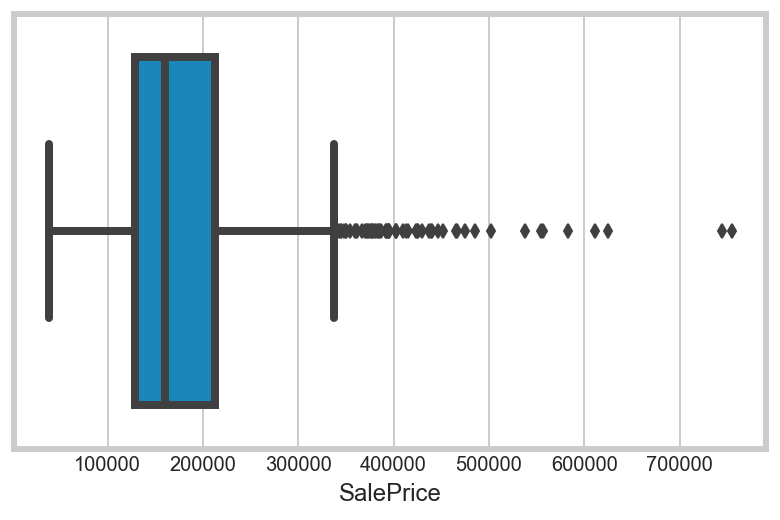

In [24]:
sns.boxplot(house['SalePrice'])

In [25]:
mask = (house['SalePrice']>700000) #removed outliers which is more than $700k
house = house[~mask]

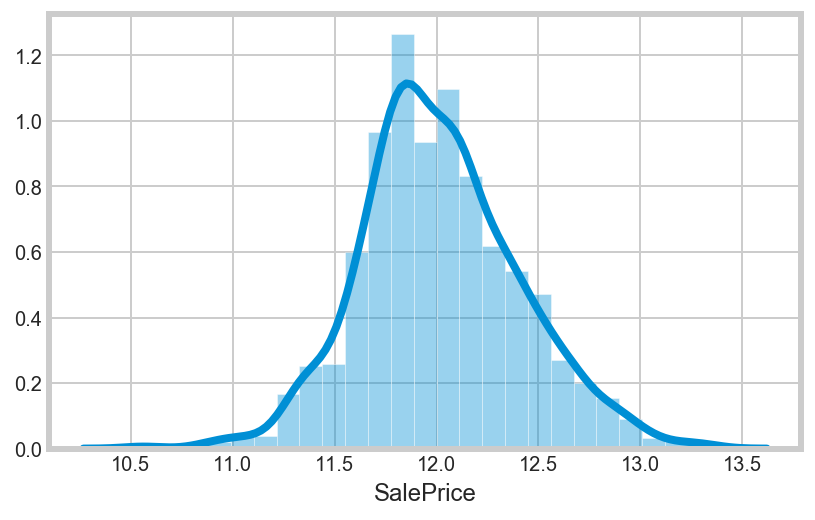

In [26]:
sns.distplot(np.log(house.SalePrice), bins = 25)

Text(0.5, 0, 'Above grade (ground) living area square feet')

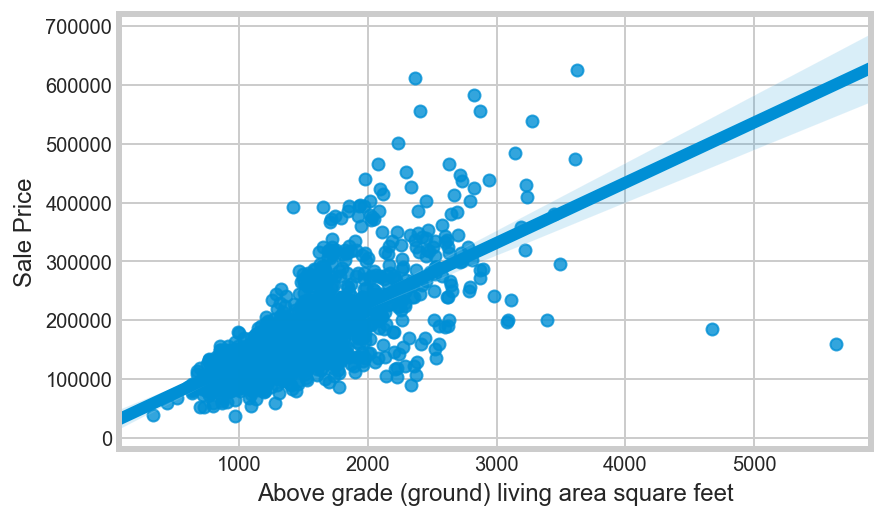

In [27]:
sns.regplot(x="GrLivArea", y="SalePrice", data=house, fit_reg=True);
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')

In [28]:
mask = (house['GrLivArea']>4000) #removed outliers which is more than 4000sqft
#house = house[~mask]

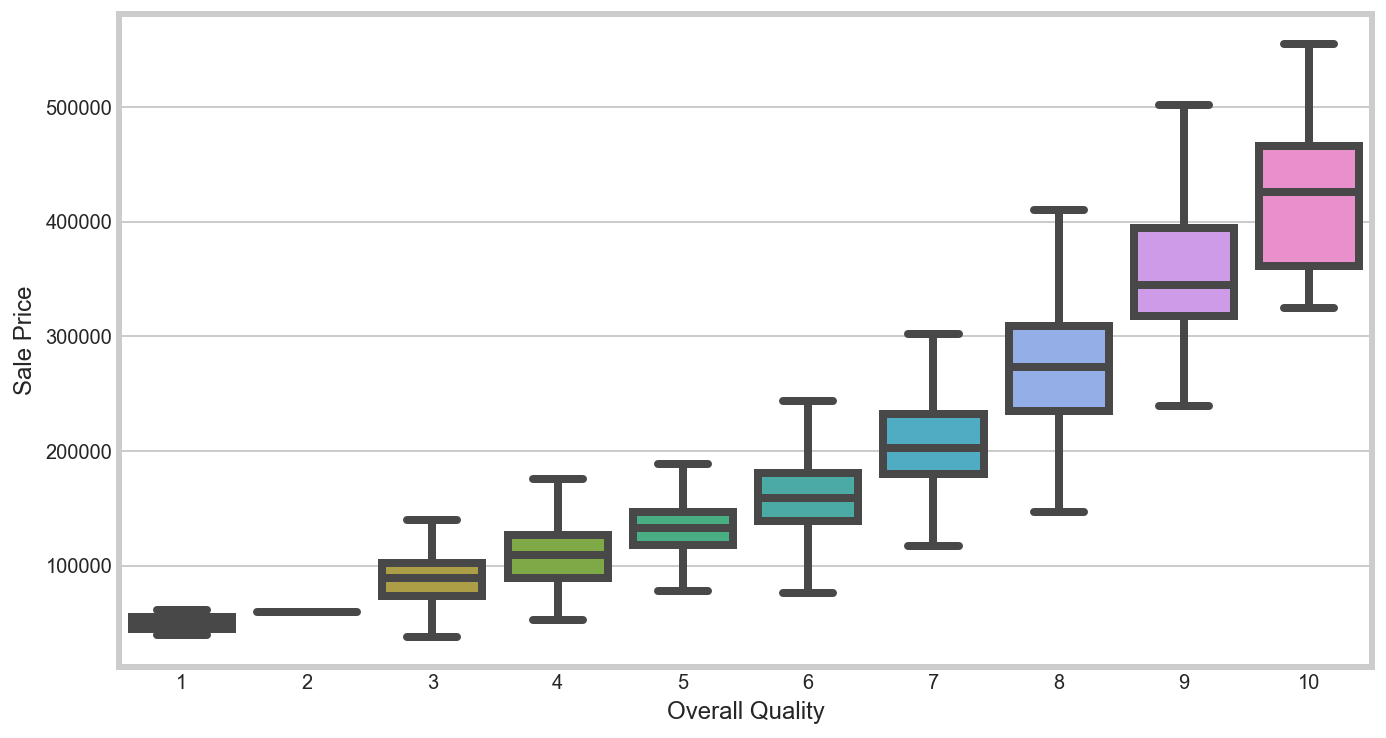

In [29]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='OverallQual', y='SalePrice', data=house, showfliers=False)
plt.ylabel('Sale Price')
plt.xlabel('Overall Quality')
plt.show()

Text(0.5, 0, 'Size of garage in square feet')

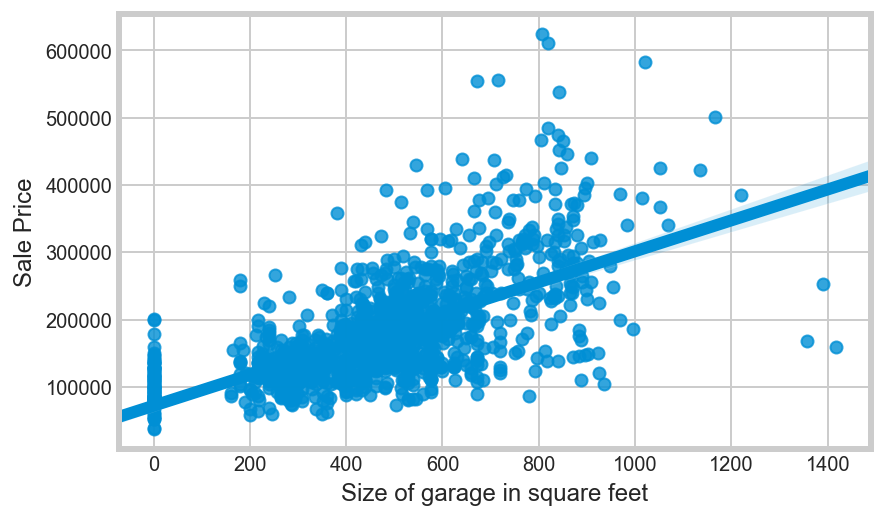

In [30]:
sns.regplot(x="GarageArea", y="SalePrice", data=house, fit_reg=True)

plt.ylabel('Sale Price')
plt.xlabel('Size of garage in square feet')

Text(0.5, 0, 'Total square feet of basement area')

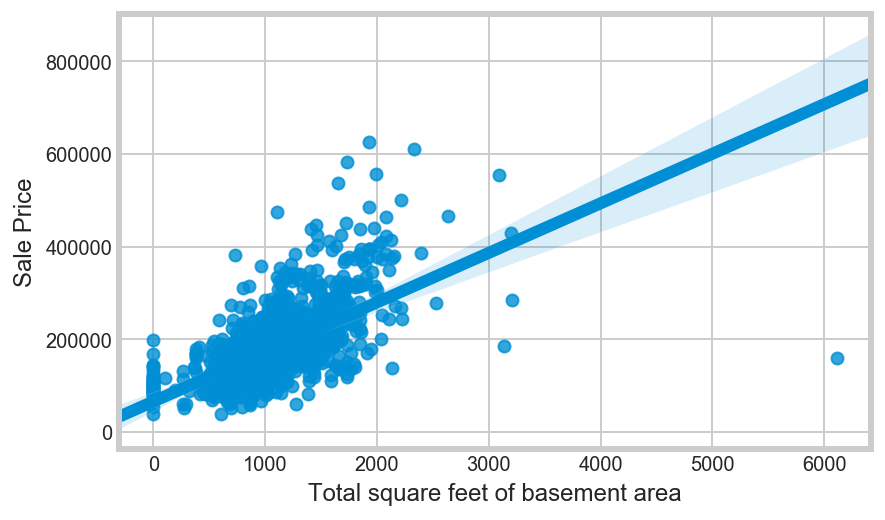

In [31]:
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=house, fit_reg=True)
plt.ylabel('Sale Price')
plt.xlabel('Total square feet of basement area')

In [32]:
mask = (house['TotalBsmtSF']>6000) #removed outliers which is more than 6000sqft
house = house[~mask]

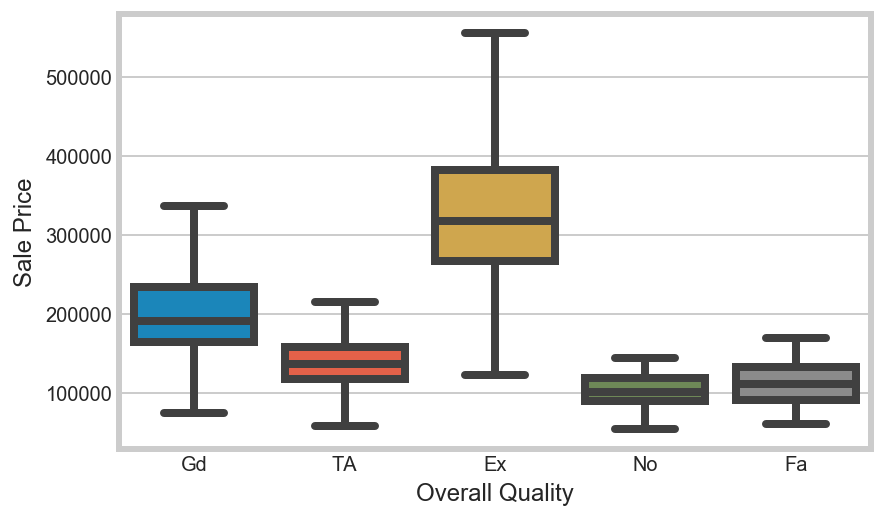

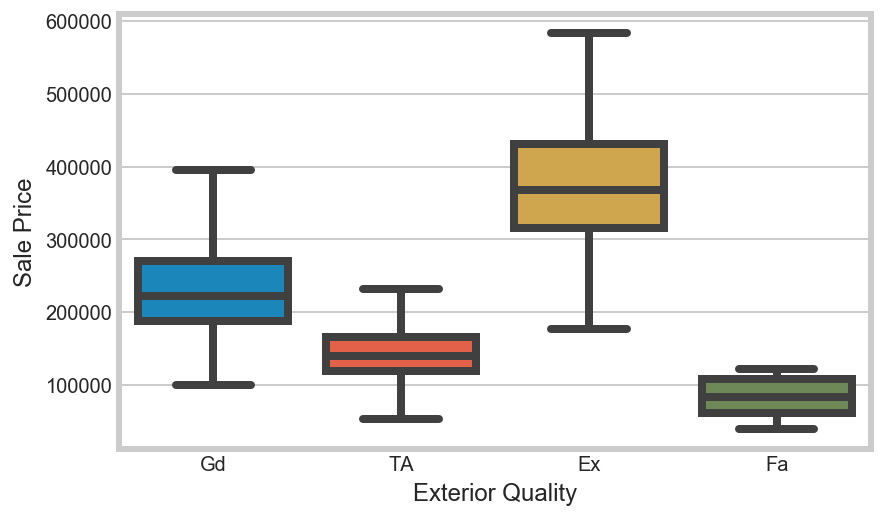

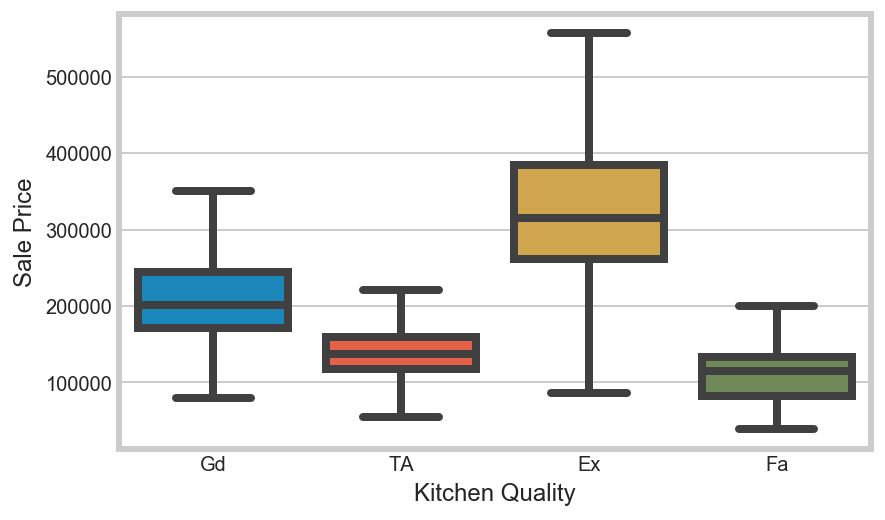

In [33]:
ax = sns.boxplot(x='BsmtQual', y='SalePrice', data=house, showfliers=False)
plt.ylabel('Sale Price')
plt.xlabel('Overall Quality')
plt.show()

ax = sns.boxplot(x='ExterQual', y='SalePrice', data=house, showfliers=False)
plt.ylabel('Sale Price')
plt.xlabel('Exterior Quality')
plt.show()

ax = sns.boxplot(x='KitchenQual', y='SalePrice', data=house, showfliers=False)
plt.ylabel('Sale Price')
plt.xlabel('Kitchen Quality')
plt.show()

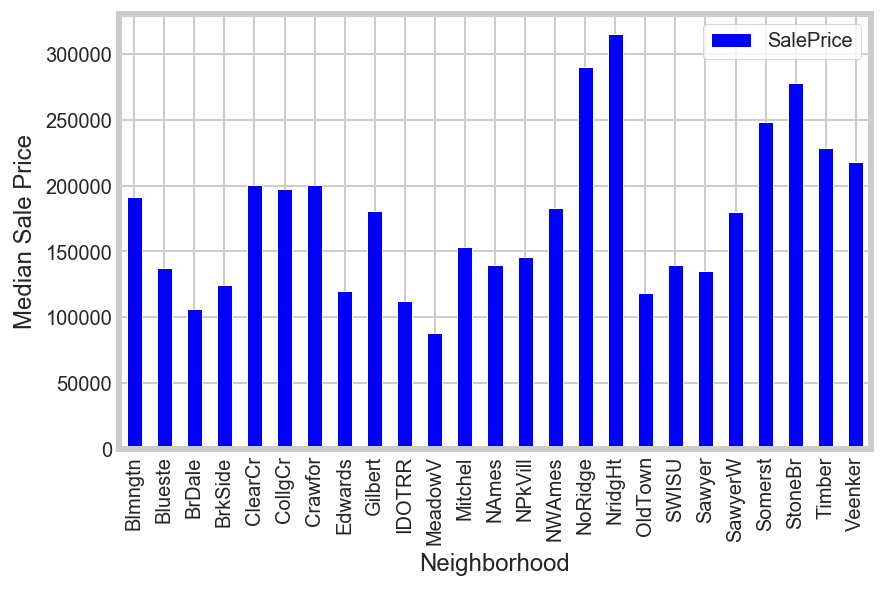

In [34]:
condition_pivot = house.pivot_table(index='Neighborhood', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Neighborhood')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=90)
plt.show()

# Feature Engineering

In [35]:
#replaced Y or N to 1 and 0
house['CentralAir'] = house['CentralAir'].map({'Y': 1, 'N': 0})

In [36]:
#Ordinal features with scalar level treated as renovable / non-fixed feature

grade_dict = {
                'Ex': 5,
                'Gd': 4,
                'TA': 3,
                'Fa': 2,
                'Po': 1,
                'No': 0,   
             }

#columns which can apply with grading scores:
grade_col = ['KitchenQual','GarageQual','GarageCond','ExterQual',
             'ExterCond','BsmtQual','BsmtCond','HeatingQC','FireplaceQu']

for col in grade_col:
    house[col] = house[col].map(grade_dict)

In [37]:
#combine into total area for Porch and Bathroom
house['TotalPorchSF'] = house['OpenPorchSF']+house['EnclosedPorch']+house['3SsnPorch']+house['ScreenPorch'] 
house['TotalBath']= house['BsmtFullBath']+house['FullBath']+house['HalfBath']

#new columns for property age
house['HouseAge'] = house['YrSold'] - house['YearBuilt']

#Renovated = 1, non-renovated = 0
house['Renovated'] = house['YearRemodAdd']-house['YearBuilt']
house['Renovated'] = np.where(house['Renovated']>0, 1, 0) #

In [38]:
drop_list = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','YearBuilt',
             'YearRemodAdd','BsmtFullBath','FullBath','HalfBath']

house = house.drop(columns=drop_list)

In [39]:
house.shape

(1382, 64)

In [40]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'Fence', 'MoSold', 'YrSold', 'SalePrice', 'TotalPorchSF', 'TotalBath', 'HouseAge', 'Renovated'], dtype='object')

In [41]:
renovable = ['OverallQual','RoofStyle','RoofMatl','Exterior1st',
             'Exterior2nd','ExterQual','OverallCond','ExterCond',
             'BsmtCond','GarageCond','BsmtQual','BsmtExposure',
             'BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
             'Electrical','GarageQual','Fence','KitchenQual', 
             'FireplaceQu']

In [42]:
fixed = house.drop(renovable, axis=1)
fixed.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'MoSold', 'YrSold', 'SalePrice', 'TotalPorchSF', 'TotalBath', 'HouseAge', 'Renovated'], dtype='object')

In [43]:
#put MSSubClass under categorical variables
fixed['MSSubClass'] = fixed['MSSubClass'].astype('object')

In [44]:
fixed_obj = fixed.select_dtypes('O')
fixed_obj.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'MasVnrType', 'Foundation', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive'], dtype='object')

In [45]:
dum = pd.get_dummies(fixed.select_dtypes('O'), drop_first=True)

In [46]:
house_data = pd.concat([fixed, dum], axis=1)
house_data = house_data.drop(columns=fixed_obj)

In [47]:
X = house_data.drop(columns='SalePrice')
y = house_data['SalePrice']

In [48]:
X.shape

(1382, 129)

In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [50]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

#lr = LogisticRegression()
#selector = RFECV(lr, step=1, cv=10)
#selector = selector.fit(X, y)

#print(selector.support_)
#print(selector.ranking_)

# Modeling

In [51]:
now_data = house_data[house['YrSold']<2010]
future_data = house_data[house['YrSold']==2010]

In [52]:
print('All data before year 2010:', now_data.shape)
print('Year 2010 data:', future_data.shape)

All data before year 2010: (1218, 130)
Year 2010 data: (164, 130)


In [63]:
X_train = now_data.drop(columns=['SalePrice','YrSold'])
y_train = now_data['SalePrice']
X_test = future_data.drop(columns=['SalePrice','YrSold'])
y_test = future_data['SalePrice']

In [54]:
from sklearn.preprocessing import StandardScaler

# Standardise the predictor data
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.fit_transform(X_test)
#house_df_s = pd.DataFrame(Xs, columns=X.columns)

In [55]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

In [86]:
lrm= LinearRegression()
lrm_score = np.mean(cross_val_score(lrm, Xs_train, y_train, cv=10))

ridge_model = Ridge()
ridge_score = np.mean(cross_val_score(ridge_model, Xs_train, y_train, cv=10))

lasso_model = Lasso()
lasso_score = np.mean(cross_val_score(lasso_model, Xs_train, y_train, cv=10))

enet_model = ElasticNet()
enet_score = np.mean(cross_val_score(enet_model, Xs_train, y_train, cv=10))

sgd_model = SGDRegressor()
sgd_score = np.mean(cross_val_score(sgd_model, Xs_train, y_train, cv=10))

print('Linear reg score:', lrm_score)
print('Ridge score:', ridge_score)
print('Lasso score:', lasso_score)
print('Elastic net score:', enet_score)
print('Gradient descent score:', sgd_score)

Linear reg score: -1.0331927176986562e+25
Ridge score: 0.815274853176201
Lasso score: 0.8148158292713525
Elastic net score: 0.8294728928283993
Gradient descent score: 0.7651854794081546


Cross validation score shows better score on Elastic net model with R2 at 0.8294

In [100]:
from sklearn.linear_model import Ridge

score = []
alpha_value = []
alpha = np.logspace(-2, 7, 50)

for i in alpha:
    rm = Ridge(alpha=i)
    ridge_r2 = cross_val_score(rm, Xs_train, y_train, cv=5)
    r2 = np.mean(ridge_r2)
    score.append(r2)
    alpha_value.append(i)
    
for i in range (len(alpha)): 
    if score[i]==np.max(score):
        ridge_alpha = alpha[i]
        print('best alpha:',ridge_alpha)

best alpha: 255.95479226995386


In [102]:
rlm = Ridge(alpha=ridge_alpha)
rlm.fit(Xs_train, y_train)
y_hat_ridge = rlm.predict(Xs_test)
ridge_mse = mean_squared_error(y_test, y_hat_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_train_score = np.mean(cross_val_score(rlm, Xs_train, y_train, cv=5))
ridge_test_score = np.mean(cross_val_score(rlm, Xs_test, y_test, cv=5))
#ridge_r2 = r2_score(y_test, y_hat_ridge)

print('Ridge score:',cross_val_score(rlm, Xs_train, y_train, cv=10))
print('Ridge train score:',ridge_train_score)
print('Ridge test score:',ridge_test_score)
print('Ridge RMSE:',ridge_rmse)

Ridge score: [0.89395583 0.82863077 0.89642224 0.70106447 0.86920587 0.75239701
 0.89457616 0.8288304  0.79678289 0.85493227]
Ridge train score: 0.8300532581618025
Ridge test score: 0.7917407640136284
Ridge RMSE: 26284.26374182756


In [103]:
ridge_coefs = pd.DataFrame({'variable':X_train.columns,
                            'lasso coef':rlm.coef_,
                            'lasso abs_coef':np.abs(rlm.coef_)})

ridge_coefs.sort_values('lasso abs_coef', inplace=True, ascending=False)

ridge_coefs.head(10)

,variable,lasso coef,lasso abs_coef
10,GrLivArea,11048.870651,11048.870651
67,Neighborhood_NridgHt,9600.984733,9600.984733
8,1stFlrSF,9013.150702,9013.150702
6,TotalBsmtSF,7824.040781,7824.040781
3,BsmtFinSF1,6425.082264,6425.082264
73,Neighborhood_StoneBr,6302.213774,6302.213774
13,TotRmsAbvGrd,6004.403653,6004.403653
22,HouseAge,-5944.639189,5944.639189
2,MasVnrArea,5754.353795,5754.353795
9,2ndFlrSF,5423.529264,5423.529264


In [ ]:
from sklearn.linear_model import Lasso

score = []
alpha_value = []
alpha = range(-2, 500, 10)

for i in alpha:
    rm = Lasso(alpha=i)
    lasso_r2 = cross_val_score(rm, Xs_train, y_train, cv=5)
    r2 = np.mean(lasso_r2)
    score.append(r2)
    alpha_value.append(i)

for i in range (len(alpha)): 
    if score[i]==np.max(score):
        lasso_alpha = alpha[i]
        print('best alpha:',lasso_alpha)  

In [ ]:
lasso_model = Lasso(alpha=lasso_alpha)
lasso_model.fit(X_train, y_train)
y_hat_ridge = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_hat_ridge)
lasso_rmse = np.sqrt(lasso_mse)
lasso_score = np.mean(cross_val_score(lasso_model, X_train, y_train, cv=5))
#predictions = cross_val_predict(lasso_model, Xs, y, cv=5)
#lasso_r2 = r2_score(y, predictions)
lasso_r2 = r2_score(y_test, y_hat_ridge)

print('Lasso R2 scores:',cross_val_score(lasso_model, Xs, y, cv=5))
print('Lasso R2 mean score:',lasso_score)
print("Cross-Predicted R2:", lasso_r2)
print('Lasso RMSE:',lasso_rmse)

In [91]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

score = []
alpha_value = []
ratio = []
alpha = range(0,300,10)
l1_ratios = np.linspace(0.01, 1.0, 25)

for rat in l1_ratios:
    for i in alpha:
        rm = ElasticNet(alpha=i,l1_ratio=rat)
        enet_r2 = cross_val_score(rm, Xs_train, y_train, cv=10)
        r2 = np.mean(enet_r2)
        score.append(r2)
        alpha_value.append(i)
        ratio.append(rat)

In [92]:
dict = {'score':score, 'alpha_value':alpha_value,'ratio':ratio}
score_dict = pd.DataFrame(dict)
best = score_dict[score_dict['score']==np.max(score_dict['score'])].reset_index()
best_alpha = best.at[0,'alpha_value']
best_ratio = best.at[0,'ratio']
print('Best alpha value:',best_alpha)
print('l1_ratio',best_ratio)

Best alpha value: 10
l1_ratio 0.9587500000000001


In [99]:
enet = ElasticNet(alpha=best_alpha, 
                  l1_ratio=best_ratio)
enet.fit(Xs_train, y_train)

y_hat = enet_model.predict(Xs_test)
enet_mse = mean_squared_error(y_test, y_hat)
enet_rmse = np.sqrt(enet_mse)
enet_train_score = np.mean(cross_val_score(enet, Xs_train, y_train, cv=10))
enet_test_score = np.mean(cross_val_score(enet, Xs_test, y_test, cv=10))
#enet_r2 = r2_score(y_test, y_hat)

print('Elastic net scores:\n',cross_val_score(enet, Xs_train, y_train, cv=10))
print('Elastic net train score:',enet_train_score)
print('Elastic net test score:',enet_test_score)
print('Elastic net RMSE:',enet_rmse)

Elastic net scores:
 [0.88855923 0.82275827 0.88698564 0.71025355 0.85755158 0.77553568
 0.89923692 0.82537981 0.7899466  0.85296594]
Elastic net train score: 0.8309173215334159
Elastic net test score: 0.8394150775322918
Elastic net RMSE: 28285.140384462182
0.8779034728741444


In [98]:
elastic_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':enet.coef_,
                            'abs_coef':np.abs(enet.coef_)})

elastic_coefs.sort_values('abs_coef', inplace=True, ascending=False)

elastic_coefs.head(20)

,variable,coef,abs_coef
10,GrLivArea,9511.684963,9511.684963
67,Neighborhood_NridgHt,8370.492554,8370.492554
8,1stFlrSF,8268.439362,8268.439362
6,TotalBsmtSF,7470.907989,7470.907989
3,BsmtFinSF1,5927.240436,5927.240436
13,TotRmsAbvGrd,5631.009670,5631.009670
73,Neighborhood_StoneBr,5565.657328,5565.657328
2,MasVnrArea,5390.517851,5390.517851
21,TotalBath,5327.620155,5327.620155
17,GarageArea,5190.551802,5190.551802


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [ ]:
# A:

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
# A: